In [1]:
from warnings import filterwarnings

filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
from quant_invest_lab.backtest import (
    price_long_only_backtester,
    price_short_only_backtester,
)

from crypto_momentum_portfolios.data_loader import CryptoDataLoader

dl = CryptoDataLoader()
dl.assets

Loading BokehJS ...

['bitcoin',
 'ethereum',
 'bitcoin_cash',
 'ripple',
 'litecoin',
 'tron',
 'ethereum_classic',
 'chainlink',
 'stellar',
 'cardano',
 'dash',
 'tezos',
 'binancecoin',
 'solana',
 'matic_network',
 'dogecoin',
 'avalanche_2']

In [2]:
SYMBOL = "litecoin"

df = dl.get_crypto(
    [SYMBOL],
    data_frequency="weekly",
    fields=["price", "momentum"],
    flatten_fields_with_crypto=True,
    momentum_lookback=10,
)
df

,litecoin_price,litecoin_momentum
date,,
2021-01-03,137.703259,1.000000
2021-01-10,177.892458,1.000000
2021-01-17,144.272342,1.000000
2021-01-24,137.738436,1.000000
2021-01-31,132.985794,1.000000
...,...,...
2023-05-28,88.570757,0.962304
2023-06-04,95.922770,1.034972
2023-06-11,77.340958,0.859322


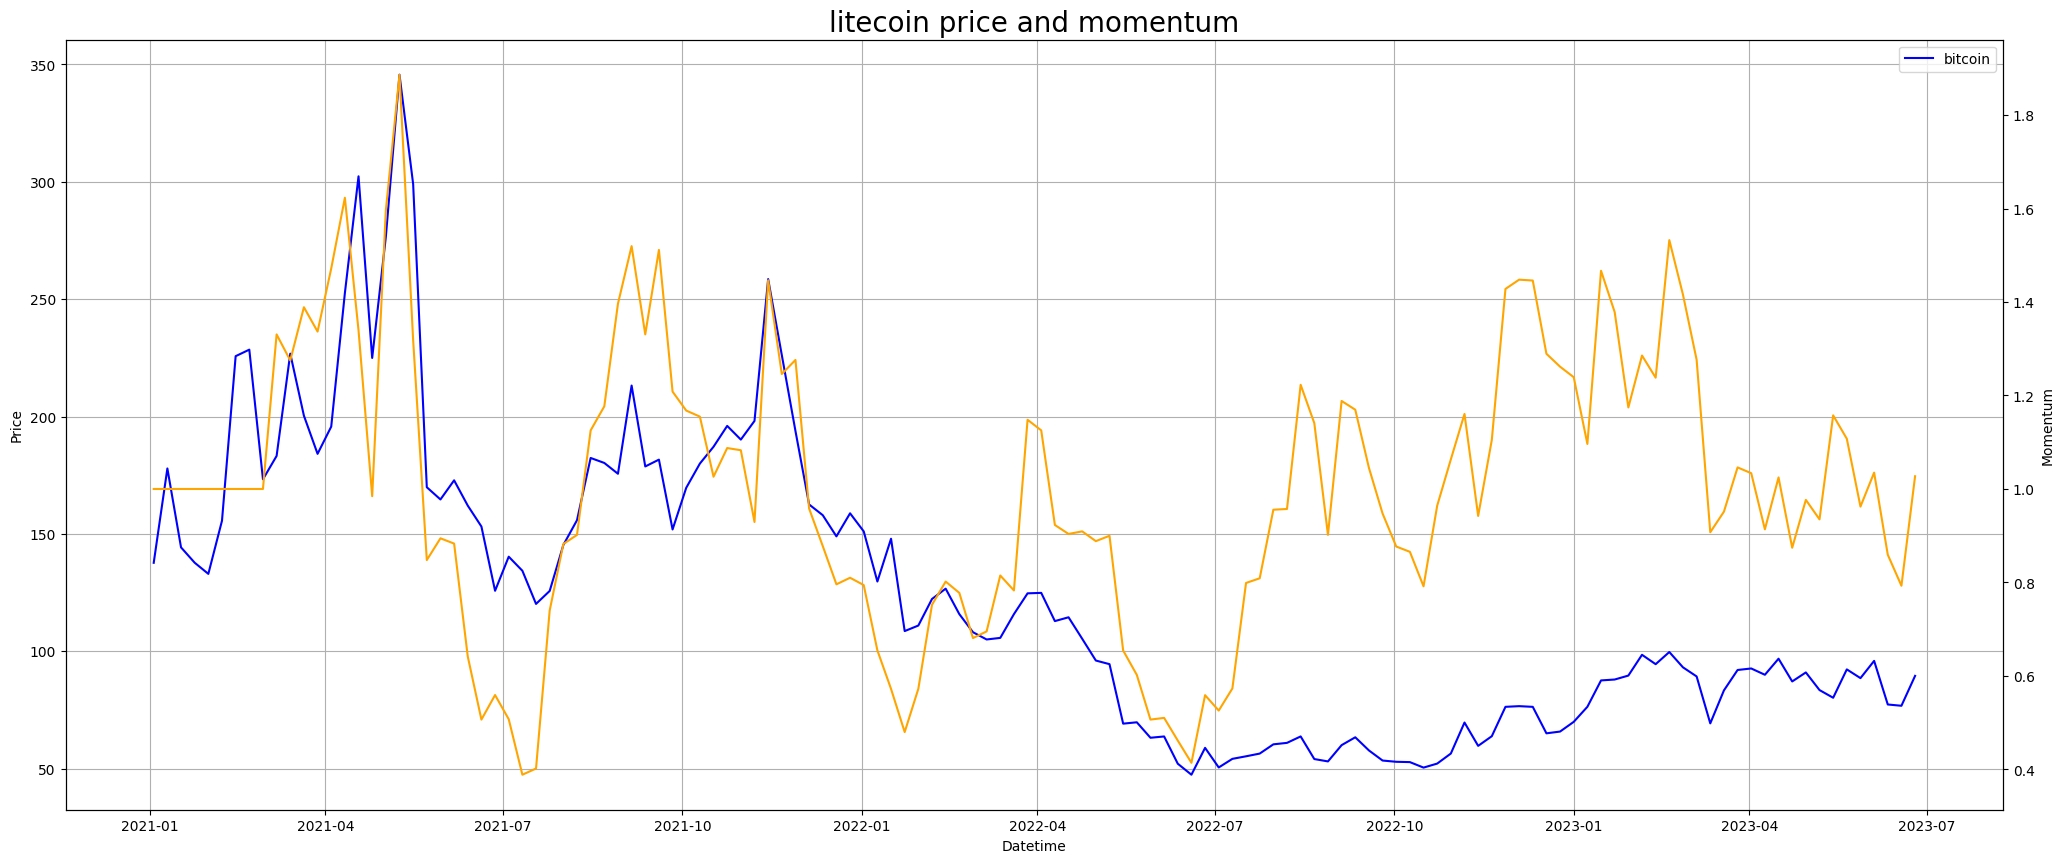

In [3]:
f, ax = plt.subplots(1, 1, figsize=(25, 10))
ax.plot(df[f"{SYMBOL}_price"], label="bitcoin", color="blue")
ax_l = ax.twinx()
ax_l.plot(df[f"{SYMBOL}_momentum"], label="MoM", color="orange")
ax.set_title(f"{SYMBOL} price and momentum", fontsize=20)
ax.set_ylabel("Price")
ax_l.set_ylabel("Momentum")
ax.set_xlabel("Datetime")
ax.legend()
ax.grid()

# Long Only


In [4]:
def long_entry_function(row: pd.Series, prev_row: pd.Series) -> bool:
    return True if row[f"{SYMBOL}_momentum"] >= 1 else False


def long_exit_function(row: pd.Series, prev_row: pd.Series, trading_days: int) -> bool:
    return True if row[f"{SYMBOL}_momentum"] < 1 else False


# Backtest your strategy
price_long_only_backtester(
    df=df,
    price_column=f"{SYMBOL}_price",
    long_entry_function=long_entry_function,
    long_exit_function=long_exit_function,
    timeframe="1day",
    initial_equity=1000,
)

-------------  Initial informations  -------------
Period: [2021-01-03 00:00:00] -> [2023-06-25 00:00:00]
Intial balance: 1000.00 $
Taker fees: 0.10 %, Maker fees: 0.10 %, All the metrics will be calculated considering these fees
Long only position

------------  Strategy performances  -------------
Strategy final net balance: 1638.13 $, return: 63.81 %
Buy & Hold final net balance: 650.20 $, returns: -34.98 %
Strategy winrate ratio: 53.85 %
Strategy payoff ratio: 3.45
Strategy profit factor ratio: 4.02
Strategy expectancy: 139.58 %

-------  Returns statistical information  --------
Expected return annualized: 388.29 % vs 206.33 % (buy and hold)
CAGR: 299.78 % vs -70.14 % (buy and hold)
Expected volatility annualized: 223.50 % vs 254.92 % (buy and hold)
Specific volatility (diversifiable) annualized: 105.72 %
Systematic volatility annualized: 196.91 %
Skewness: 0.26 vs 0.13 (buy and hold), <0 = left tail, >0 = right tail
Kurtosis: 2.69 vs 0.13 (buy and hold) , >3 = fat tails, <3 = thi

# Short Only


In [5]:
def short_entry_function(row: pd.Series, prev_row: pd.Series) -> bool:
    return True if row[f"{SYMBOL}_momentum"] < 1 else False


def short_exit_function(row: pd.Series, prev_row: pd.Series, trading_days: int) -> bool:
    return True if row[f"{SYMBOL}_momentum"] >= 1 else False


# Backtest your strategy
price_short_only_backtester(
    df=df,
    price_column=f"{SYMBOL}_price",
    short_entry_function=short_entry_function,
    short_exit_function=short_exit_function,
    timeframe="1day",
    initial_equity=1000,
)

-------------  Initial informations  -------------
Period: [2021-01-03 00:00:00] -> [2023-06-25 00:00:00]
Intial balance: 1000.00 $
Taker fees: 0.10 %, Maker fees: 0.10 %, All the metrics will be calculated considering these fees
Short only positions

------------  Strategy performances  -------------
Strategy final net balance: 625.13 $, return: -37.49 %
Buy & Hold final net balance: 650.20 $, returns: -34.98 %
Strategy winrate ratio: 53.85 %
Strategy payoff ratio: 1.01
Strategy profit factor ratio: 1.17
Strategy expectancy: 8.03 %

-------  Returns statistical information  --------
Expected return annualized: 69.16 % vs 206.33 % (buy and hold)
CAGR: -73.26 % vs -70.14 % (buy and hold)
Expected volatility annualized: 201.25 % vs 254.92 % (buy and hold)
Specific volatility (diversifiable) annualized: 123.13 %
Systematic volatility annualized: 159.19 %
Skewness: 0.35 vs 0.13 (buy and hold), <0 = left tail, >0 = right tail
Kurtosis: 2.52 vs 0.13 (buy and hold) , >3 = fat tails, <3 = thin